<a href="https://colab.research.google.com/github/jamesmaddison/Titanic/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Survival Prediction 

This is my attempt at the Titanic Kaggle competition. The goal is to predict if a passenger survived the titanic disaster based on the data avaiable

In [90]:
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import math
%matplotlib inline

from sklearn import naive_bayes

from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier) 

In [91]:
df_test = pd.read_csv('Data/test.csv')
df_train = pd.read_csv('Data/train.csv')

#Data Exploration

In [92]:
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [93]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [94]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [95]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


**Age, Cabin, Embarked and Fare have missing values which must be populated**

In [96]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [97]:
df_test = df_test.drop(['PassengerId'], axis=1)
df_train = df_train.drop(['PassengerId'], axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


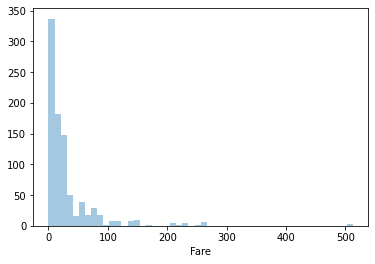

In [98]:
sns.distplot(df_train['Fare'], kde=False)

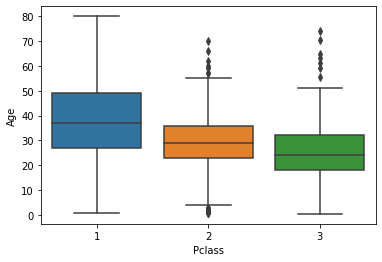

In [99]:
sns.boxplot(x='Pclass', y ='Age', data = df_train)

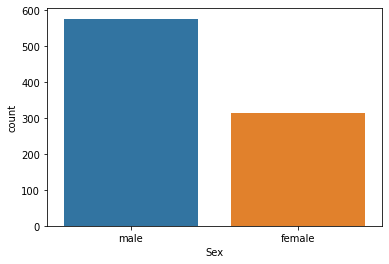

In [100]:
sns.countplot(x='Sex', data = df_train )

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


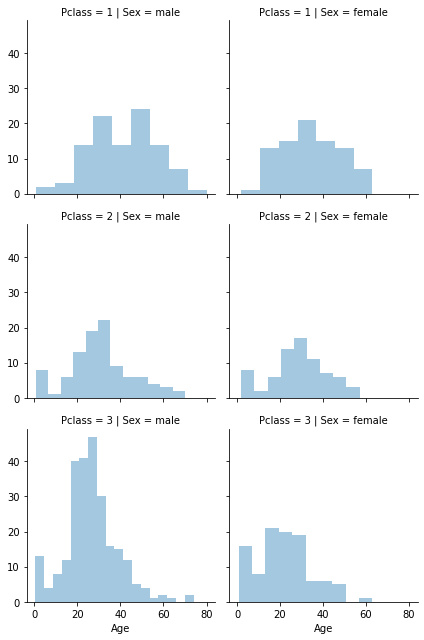

In [101]:
g = sns.FacetGrid(data=df_train, col='Sex', row = 'Pclass')
g.map(sns.distplot, 'Age',kde=False)

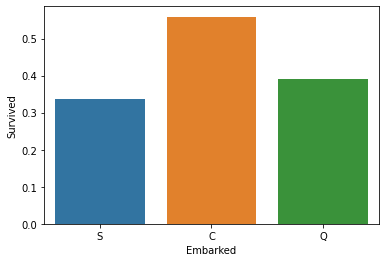

In [208]:
embark_perc = df_train[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()

sns.barplot(x='Embarked', y='Survived', data=embark_perc,order=['S','C','Q'])

Text(0.5, 1.0, 'Titanic Correlation')

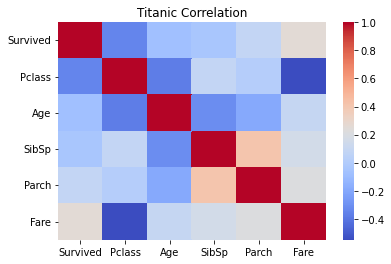

In [102]:
tc = df_train.corr()
sns.heatmap(tc, cmap='coolwarm')
plt.title('Titanic Correlation')

In [204]:
for x in ['Pclass', 'Sex','SibSp','Parch']:
    if df_train[x].dtype != 'float64' :
        print('Survival Correlation by:', x)
        print(df_train[[x, 'Survived']].groupby(x, as_index=False).mean())
        print('-'*10, '\n')
        
print(pd.crosstab(df_train['Title'],df_train['Survived']))

Survival Correlation by: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
---------- 

Survival Correlation by: Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
---------- 

Survival Correlation by: SibSp
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
---------- 

Survival Correlation by: Parch
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000
---------- 

Survived        0    1
Title                 
Capt            1    0
Col             1    1
Don             1    0
Dr              4    3
Jonkheer        1    0
Lady            0    1
Major           1    1
Master         17   23
Miss           55  127
Mlle            0    2
Mme             0    1
Mr            436   81
Mrs            26   99
Ms              0    1
Rev          

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked', 'Title'],
      dtype='object')

#Data Cleaning and Feature *Engineering*

**Creating a 'Title' variable from the Name column**

In [103]:
df_train['Title'] = df_train['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
df_train['Title']= df_train['Title'].str.strip()

df_test['Title'] = df_test['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
df_test['Title']= df_test['Title'].str.strip()

In [104]:
print('Train Titles')
print(df_train['Title'].value_counts())
print(20*'-')
print('Test Titles')
print(df_test['Title'].value_counts())

Train Titles
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Major             2
Mlle              2
Jonkheer          1
Capt              1
the Countess      1
Don               1
Ms                1
Sir               1
Lady              1
Mme               1
Name: Title, dtype: int64
--------------------
Test Titles
Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dona        1
Ms          1
Dr          1
Name: Title, dtype: int64


**Counting Missing values**

In [105]:
for c in df_train.columns:
    print('{}: {}'.format(c, df_train[c].isna().sum()))
print(20*'-')
for c in df_test.columns:
    print('{}: {}'.format(c, df_test[c].isna().sum()))

Survived: 0
Pclass: 0
Name: 0
Sex: 0
Age: 177
SibSp: 0
Parch: 0
Ticket: 0
Fare: 0
Cabin: 687
Embarked: 2
Title: 0
--------------------
Pclass: 0
Name: 0
Sex: 0
Age: 86
SibSp: 0
Parch: 0
Ticket: 0
Fare: 1
Cabin: 327
Embarked: 0
Title: 0



**Missing Fare**

For the single missing fare in the test data we will take the mean value for the given embarked value as there is a large variance in fare based on embarked location


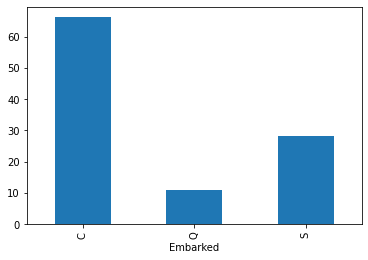

In [109]:
df_test.groupby('Embarked')['Fare'].mean().plot(kind='bar')

In [108]:
df_test.loc[df_test['Fare'].isna(), 'Fare'] = df_test.groupby('Embarked')['Fare'].mean()['S']

**Missing Embarked**

For the missing embarked value we will do the opposite of fare, we will identify the closest embarked group based on the mean fare of each group.

In [ ]:
embarked_fare_lookup = df_test.groupby('Embarked')['Fare'].mean()
embarked_means = []
embarked_dict = {}

#Create variables for bi-directional lookup of means

for i in embarked_fare_lookup.keys():
  embarked_means.append(embarked_fare_lookup[i])
  embarked_dict[embarked_fare_lookup[i]] = i

#Find group closest to mean and assign.
for index, row in df_train.loc[df_train['Embarked'].isna()].iterrows() :
  print(df_train.loc[index,'Embarked'])
  df_train.loc[index,'Embarked'] = embarked_dict[min(embarked_means, key=lambda x:abs(x-row['Fare']))]
  print(df_train.loc[index,'Embarked'])


**Populating Missing Ages**

We can utilise the new title variable to populate age based on mean age for the title group. This will hopefully give a more accurate result than using an overall mean or median.

In [175]:
#Create dictionary of median age per title.
median_age_dict = {}
for i in df_train['Title'].unique():
    median_age_dict[i] = np.nanmedian(df_train['Age'].loc[df_train['Title'].isin([i])])
    print('{} : {} '.format(i, median_age_dict[i]))

Mr : 30.0 
Mrs : 35.0 
Miss : 21.0 
Master : 3.5 
Don : 40.0 
Rev : 46.5 
Dr : 46.5 
Mme : 24.0 
Ms : 28.0 
Major : 48.5 
Lady : 48.0 
Sir : 49.0 
Mlle : 24.0 
Col : 58.0 
Capt : 70.0 
the Countess : 33.0 
Jonkheer : 38.0 


In [176]:
for i in pd.concat([  df_train['Title'], df_test['Title']]).unique():
   if i in median_age_dict.keys():
      cur_age = median_age_dict[i]
   else:
      cur_age = np.round(df_train['Age'].mean(), 0)

   if df_train.loc[df_train['Title']==i, ['Age']].isnull().values.any():
      df_train.loc[np.logical_and(df_train['Title']==i, df_train['Age'].isnull()), ['Age']] = cur_age
   
   if  df_test.loc[df_test['Title']==i, ['Age']].isnull().values.any():
      df_test.loc[np.logical_and(df_test['Title']==i, df_test['Age'].isnull()), ['Age']] = cur_age


As so many Cabin values are missing, we will simply drop cabin for now

In [180]:
df_train = df_train.drop('Cabin', 1)
df_test = df_test.drop('Cabin', 1)

In [181]:
#Validate all missing ages are populated
for c in df_train.columns:
    print('{}: {}'.format(c, df_train[c].isna().sum()))
print(20*'-')
for c in df_test.columns:
    print('{}: {}'.format(c, df_test[c].isna().sum()))

Survived: 0
Pclass: 0
Name: 0
Sex: 0
Age: 0
SibSp: 0
Parch: 0
Ticket: 0
Fare: 0
Embarked: 0
Title: 0
--------------------
Pclass: 0
Name: 0
Sex: 0
Age: 0
SibSp: 0
Parch: 0
Ticket: 0
Fare: 0
Embarked: 0
Title: 0


**Creating Family Size Variable**

#Model Training and Evaluation